<a href="https://www.kaggle.com/code/musaali2436/plant-disease-classification?scriptVersionId=167461584" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras import layers
from keras import models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-03-17 14:10:15.735179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 14:10:15.735309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 14:10:15.907674: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Define paths to your training and validation data
train_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
validation_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

In [4]:
# Data Augmentation for Training Data
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values to [0, 1]
    rotation_range=40,           # Rotate images randomly up to 40 degrees
    width_shift_range=0.2,       # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,      # Shift images vertically by up to 20% of the height
    shear_range=0.2,             # Shear transformation with a maximum shear intensity
    zoom_range=0.2,              # Zoom in randomly by up to 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill in missing pixels using the nearest neighbor
)

# Data Augmentation for Validation Data (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'categorical' if you have more than 2 classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'categorical' if you have more than 2 classes
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Feature-Selection Using VGG16

In [6]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the pre-trained layers
for layer in vgg_model.layers:
    layer.trainable = False
# Create a new model
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(38, activation='softmax')  # For binary classification
    # If you have more than two classes, use Dense(num_classes, activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',  # For binary classification
    # If you have more than two classes, use loss='categorical_crossentropy'
    optimizer=Adam(learning_rate=0.01),     # You can adjust the learning rate as needed
    metrics=['accuracy']
)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=3,  # You can adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    verbose = 1
)

Epoch 1/3


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   1/2196 ━━━━━━━━━━━━━━━━━━━━ 20:38:58 34s/step - accuracy: 0.0000e+00 - loss: 4.2134

I0000 00:00:1710684684.095340      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710684684.115830      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 964/2196 ━━━━━━━━━━━━━━━━━━━━ 9:20 455ms/step - accuracy: 0.4792 - loss: 14.1708

W0000 00:00:1710685122.600700      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.5710 - loss: 10.9510

W0000 00:00:1710685650.912573      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1081s 477ms/step - accuracy: 0.5710 - loss: 10.9497 - val_accuracy: 0.7958 - val_loss: 6.5957
Epoch 2/3
   1/2196 ━━━━━━━━━━━━━━━━━━━━ 4:30 123ms/step - accuracy: 0.7500 - loss: 6.7643

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7500 - loss: 6.7643 - val_accuracy: 0.7500 - val_loss: 4.4254
Epoch 3/3
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 828s 376ms/step - accuracy: 0.7761 - loss: 7.1568 - val_accuracy: 0.8230 - val_loss: 7.4579


In [9]:
import matplotlib.pyplot as plt

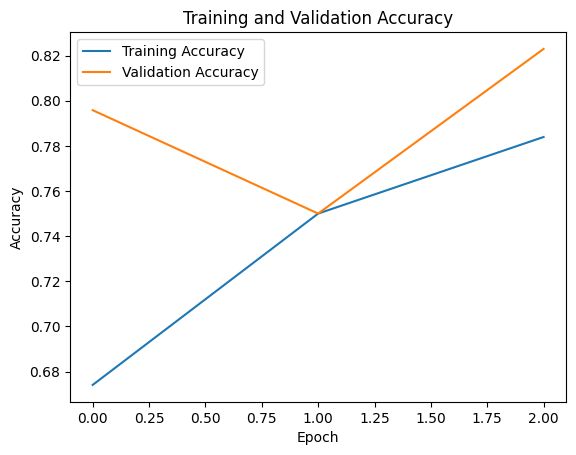

In [10]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


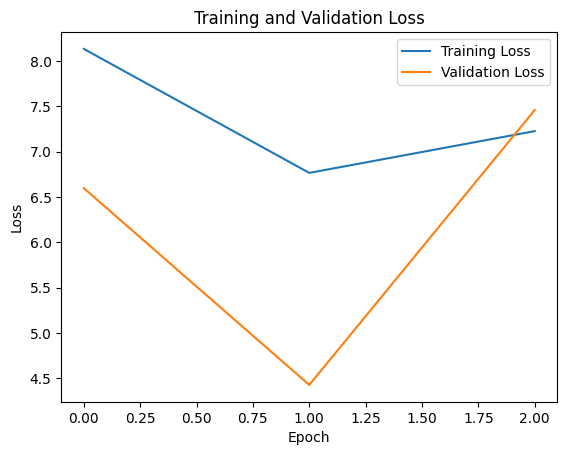

In [11]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
test_dir = '/kaggle/input/new-plant-diseases-dataset/test'


# Data Augmentation for Test Data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a data generator for the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'categorical' if you have more than 2 classes
)


Found 33 images belonging to 1 classes.


In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0625 - loss: 9975.0986
Test Loss: 9975.0986328125
Test Accuracy: 0.0625


W0000 00:00:1710686571.327994      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Fine-Tuning using Vgg16


In [14]:
from tensorflow.keras.layers import BatchNormalization

In [15]:
vgg_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the pre-trained layers
# for layer in vgg_model1.layers:
#     layer.trainable = False
# Create a new model
model1 = Sequential([
    vgg_model1,
    Flatten(),
    Dense(38, activation='softmax')  # For binary classification
    # If you have more than two classes, use Dense(num_classes, activation='softmax')
])

In [16]:
# Compile the model
model1.compile(
    loss='categorical_crossentropy',  # For binary classification
    # If you have more than two classes, use loss='categorical_crossentropy'
    optimizer=Adam(learning_rate=0.01),     # You can adjust the learning rate as needed
    metrics=['accuracy']
)

In [17]:
# Train the model
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=3,  # You can adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    verbose = 1
)

Epoch 1/3


W0000 00:00:1710686628.653691      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2057/2196 ━━━━━━━━━━━━━━━━━━━━ 49s 359ms/step - accuracy: 0.0280 - loss: 52852604.0000

W0000 00:00:1710687403.443729      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.0280 - loss: 49965936.0000

W0000 00:00:1710687453.678813      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2196/2196 ━━━━━━━━━━━━━━━━━━━━ 939s 404ms/step - accuracy: 0.0280 - loss: 49946388.0000 - val_accuracy: 0.0286 - val_loss: 3.6382
Epoch 2/3
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1s 205us/step - accuracy: 0.0625 - loss: 3.6188 - val_accuracy: 0.0000e+00 - val_loss: 3.6601
Epoch 3/3
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 854s 388ms/step - accuracy: 0.0282 - loss: 3.6388 - val_accuracy: 0.0276 - val_loss: 3.6389


In [18]:
import matplotlib.pyplot as plt

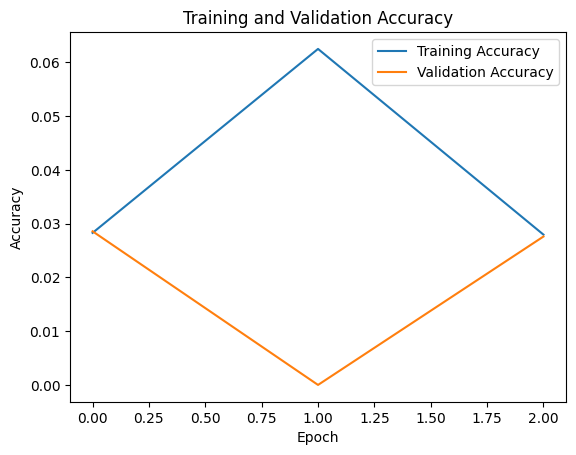

In [19]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

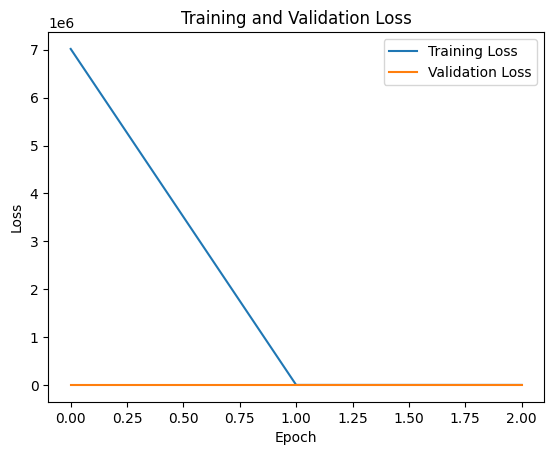

In [20]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Analysis of Results

